# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
import time

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
env = UnityEnvironment(file_name="...")
env = UnityEnvironment(file_name="Banana.app")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
#env_info = env.reset(train_mode=False)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
score = 0    # initialize the score
keep_going_random = False
while keep_going_random:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```


In [1]:
from unityagents import UnityEnvironment
import numpy as np
import time

In [2]:
#***IMPORTANT -- there appears to be a bug with UnityEnvironment. This cell must be run independantly. 
#YOU CAN only create one unity environment within one process or else you get a "broken pipe" error.
#**Therefore the code above cannot be run first without generating an error. I am running MACOS with
#Catalina so it is possible the error is just with my specific environment.

#Model already trained so I am just illustrating now that the model is trainable and it works. It starts out
#getting higher scores becuase it is already trained. Its a very small model with only 2 hidden layers. 

env2 = UnityEnvironment(file_name="Banana.app")


# Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

# In[3]:


# get the default brain
brain_name = env2.brain_names[0]
brain = env2.brains[brain_name]


# ### 2. Examine the State and Action Spaces
# 
# The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
# - `0` - walk forward 
# - `1` - walk backward
# - `2` - turn left
# - `3` - turn right
# 
# The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 
# 
# Run the code cell below to print some information about the environment.

# In[4]:


# reset the environment
env_info = env2.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

from dqn_agent import ReplayBuffer
from dqn_agent import Agent


LOAD_PREV_MODEL = True

SET_EPS = False

#MODEL_FILE_NAME = "MODEL_CHECKPOINT.5962643.model" #**The required checkpoint model
#MODEL_FILE_NAME = "MODEL_CHECKPOINT.888602.model" #**The required checkpoint model
MODEL_FILE_NAME = "MODEL_CHECKPOINT.2143512.model" #**The required checkpoint model

max_games = 205
max_steps = 100000

my_agent = Agent(37, action_size, 0)

if LOAD_PREV_MODEL:
    my_agent.load_model(MODEL_FILE_NAME, 37, action_size, 0)

epsilon = 0.9
min_eps = 0.1
all_scores = []
local_scores = [] #*we can tally scores over 13. So we know if we passed. 

#env_info = env.reset(train_mode=False)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
#score = 0           # initialize the score

TRAIN_MODEL = True

for idx_games in range(1, max_games):
    env_info = env2.reset(train_mode=False)[brain_name]  # reset the environment
    state = env_info.vector_observations[0]  # get the current state
    score = 0  # initialize the score
    print("GAME NUMBER: " + str(idx_games))
    if idx_games == 100:  #**Train a bunch of games with high Espilon
            print("No longer training!")
            TRAIN_MODEL = False
    if idx_games == 100:  #**Turn off Epislon after 1000 games
            print("Turning off epsilon!")
            epsilon = 0 
    if idx_games % 100 == 0: #**Well write out check points here
        print("WRITING MODEL.")
        my_agent.save_model()
    if idx_games % 100 == 0:  #**Well calculate average score here every 100 games
        above_13 = 0
        below_13 = 0
        for ix in local_scores:
            if ix < 13:
                below_13 += 1 #*score below 13
            else:
                above_13 += 1 #*score above 13
        print("Scores 13 or above: " + str(above_13))
        print("Scores below 13: " + str(below_13))
        total_them = 0
        for ixx in local_scores:
            total_them += ixx
        average_score = total_them / 100
        print("Average Score over Last 100: " + str(average_score))
        local_scores = [] #**clear it out
    if SET_EPS:
        if idx_games % 100 == 0 and epsilon >= min_eps:
            print("DECAYING EPS: " + str(epsilon))
            #epsilon = epsilon - 0.1     #***we wont decay now
    #for steps_idx in range(0, max_steps):
    while True:
        #action = np.random.randint(action_size)        # select an action
        action = my_agent.act(state, epsilon)  #***simply returns actions, from local policy network.
        #print("ACTION: " + str(action))
        env_info = env2.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        
        if reward == -1:
            reward = -200
        if reward == 1:
            reward = 200
        if reward == 0:
            reward = 0 #**implement a cost might make it faster! 
        if TRAIN_MODEL: #**Give option to not train model! 
            my_agent.step(state, action, reward, next_state, done)
        state = next_state
        if done:   # exit loop if episode finished
            all_scores.append(score) #**We need to plot our scores!
            local_scores.append(score)
            break
    print("Score: {}".format(score))


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
GAME NUMBER: 1
Score: 1.0
GAME NUMBER: 2
Score: 1.0
GAME NUMBER: 3
Score: 1.0
GAME NUMBER: 4
Score: 0.0
GAME NUMBER: 5
Score: 0.0
GAME NUMBER: 6
Score: -3.0
GAME NUMBER: 7
Score: 1.0
GAME NUMBER: 8
Score: 1.0
GAME NUMBER: 9
Score: 0.0
GAME NUMBER: 10
Score: 5.0
GAME NUMBER: 11
Score: -1.0
GAME NUMBER: 12
Score: 2.0
GAME NUMBER: 13
Score: 0.0
GAME NUMBER: 14
Score: 0.0
GAME NUMBER: 15
Score: 1.0
GAME NUMBER: 16
Score: 0.0
GAME NUMBER: 17
Score: 0.0
GAME NUMBER: 18
Score: 1.0
GAME NUMBER: 19
Score: 0.0
GAME NUMBER: 20
Score: -1.0
GAME NUMB

Saving model
Graph of Scores:
Model Saved: MODEL_CHECKPOINT.2004788.model.pt


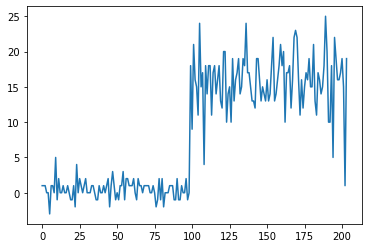

In [3]:
print("Saving model")  
print("Graph of Scores:")
my_agent.save_model()  #**The required checkpoint model
from matplotlib import pyplot as plt
plt.plot(all_scores) #**Well do a little score plot
plt.show()
# When finished, you can close the environment.

# In[ ]:


env2.close()